<a href="https://colab.research.google.com/github/DianaTorres-4/Inteligencia-Artificial/blob/main/Multicapa/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()


Lo primero que haremos es cargar el dataset

In [ ]:
print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Vemos que iris es un diccionario por lo tanto vamos a ver las llaves que contiene el diccionario

In [ ]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Pondremos un print del diccionario iris y loa llave DESCR nos mostrara toda la informacion que contiene el dataset

In [ ]:
iris.target_names
iris.target
iris.data
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Despues vamos a ver las demas llaves y sus respectivos valores del dataset

In [ ]:
import pandas as pd

iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Importamos a la libreria pandas y ahora crearemos un data frame, esto nos ayudara a tener una mejor visualizacion recordando que  si el target es 0 la especie es setosa, si el target es 1 la especie es versicolor y si el target es 2, la especie es virginica.

In [ ]:
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Nos mostrara una pequeña descripcion estadistica con %

In [ ]:
X = iris_df
y = pd.get_dummies(iris.target).values


Definiremos los parametros

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)


Divideremos el conjunto de datos prueba y los de entrenamiento

In [ ]:
print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


Nos mostrara los datos de los datos prueba y los datos de entrenamiento

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Pediremos que las imagenes de los datos tengan una media de 0 y una desviacion estandar de 1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax'),
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Se utiliza Sequential para definir el modelo de red neuronal.Despues vampos a  agregar capas de entrada y ocultas conectadas y una capa de salida con activación softmax para clasificar las flores del iris en clases.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


Crearemos un optimizador con tasa de aprendizaje del 0.001

In [ ]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Compilaremos el codigo se utilizara tambien la funcion de perdida para que nos ayude a la clasificacion

In [ ]:
history = modelo.fit(
    X_train, y_train,
    epochs=10, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6129 - loss: 0.9454 - val_accuracy: 0.8667 - val_loss: 0.4374
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8447 - loss: 0.4404 - val_accuracy: 0.9000 - val_loss: 0.2695
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8428 - loss: 0.3752 - val_accuracy: 0.9667 - val_loss: 0.1696
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9349 - loss: 0.2067 - val_accuracy: 1.0000 - val_loss: 0.1262
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9477 - loss: 0.1677 - val_accuracy: 0.9000 - val_loss: 0.1348
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9479 - loss: 0.1396 - val_accuracy: 1.0000 - val_loss: 0.0763
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9567 - loss: 0.1231 - val_accuracy: 1.0000 - val_loss: 0.0713
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9624 - loss: 0.1301 - val_accuracy: 1.

Se entrena el modelo en los datos de entrenamiento y debemos de especificar el número de épocas que queremos que nos muestere y ver si aprende el modelo o no

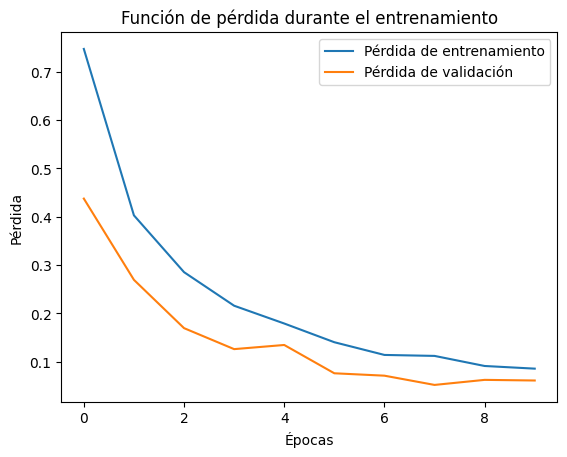

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


Ahora pedirmeos que nos muestre una grafica en la cual podemos ver de manera visula si el modelo aprende o no y podemos nostra que si el modelo esta pegando al 0 esta aprendiendo de lo contrario no

In [ ]:
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.9667 - loss: 0.0614
Loss: 0.061371758580207825, Accuracy: 0.9666666388511658


Pedimos que evalue el modelo y nos muestre los datos de prueba y los de entrenamiento segun lo que muestra la garfica y ver si aprende o no

In [ ]:
predictions = modelo.predict(X_test)
# Obtener el índice de la clase predicha para cada punto de datos
predicted_classes = np.argmax(predictions, axis=1)
# Obtenemos el índice de la clase real de y_test
actual_classes = np.argmax(y_test, axis=1)

comparison = pd.DataFrame({'Actual Class Index': actual_classes, 'Predicted Class Index': predicted_classes})
# Agregar columnas con los nombres reales y predichos de las flores utilizando iris.target_names
comparison['Actual Flower'] = [iris.target_names[i] for i in actual_classes]
comparison['Predicted Flower'] = [iris.target_names[i] for i in predicted_classes]
# Reordenar las columnas para una mejor visualización
comparison = comparison[['Actual Class Index', 'Actual Flower', 'Predicted Class Index', 'Predicted Flower']]
print(comparison.head())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
   Actual Class Index Actual Flower  Predicted Class Index Predicted Flower
0                   1    versicolor                      1       versicolor
1                   0        setosa                      0           setosa
2                   2     virginica                      2        virginica
3                   1    versicolor                      1       versicolor
4                   1    versicolor                      1       versicolor


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

y_pred = modelo.predict(X_test)
# Convertir las predicciones a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)
# Calcular la sensibilidad
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 0.8888888888888888
Class 2: 1.0


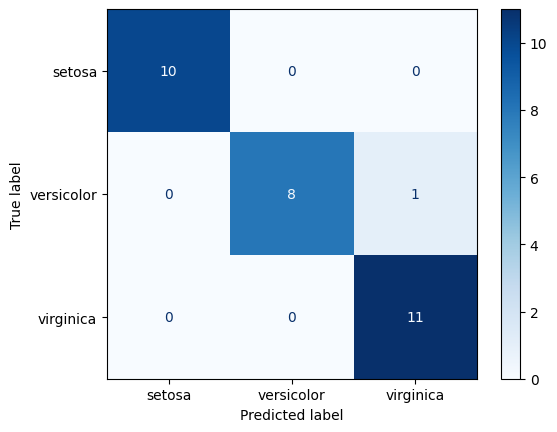

In [ ]:
# Visualizar la matriz de confusión como una imagen de colores
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(3):
    print(f'Class {i}: {sensitivity[i]}')


pedimos que nos muestren una matriz para ver de una manera mas ordenada y que entendamos cuantos modelos fallaron del total y cuantos acertaron